# Night-time lights data download and correction

Functions import.

In [1]:
from files_creation import *

## Google Earth Engine NTL images processing

### Authentication on Google

This cell allows to authenticate on Google Earth Engine and Google Drive. Connect Google Earth Engine to your Google account by granting permission and paste the provided code in the box below.

In [2]:
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AY0e-g4qXJwIUAE2RXBuGq1ogKrGw_7uqVQStkyjG9nGOrM0Lqa66HNnI64

Successfully saved authorization token.


### Countries and years of interest

Specify here what countries or regions will be processed. Either provide the country 3 letter ISO code ('KEN' for Kenya, 'RWA' for Rwanda...), or specify GPS coordinates or specify the path to a file containing the geometry (shapefile/geopackage/json...). Examples are given below.

Specify the years to be processed.

In [3]:
# List of regions to be processed
# For countries, simply specify their 3 letters ISO code, i.e 'KEN' for Kenya, 'RWA' for Rwanda...
# For other sub-administrative areas, either manually specify the coordinates of the area as below
# or specify the path to a shapefile/geopackage/json file.
# Always specify the name of the area starting with the 3 capital letters ISO code of the country.
country_ISO = ['RWA']

country_coordinates = [
    ['BFA_west',
     [
         [-0.9851614004131526, 15.514566388234844],
         [-4.654594994163152, 13.557899401742754],
         [-5.753227806663152, 11.778644300494214],
         [-5.819145775413152, 10.117605556454214],
         [-4.654594994163152, 9.294604147516118],
         [-2.4133840566631526, 9.18616654324237]
     ]
    ],
    ['BFA_east',
     [
         [-0.9851614004131526, 15.514566388234844],
         [-2.4133840566631526, 9.18616654324237],
         [-1.5344778066631526, 10.441904413705647],
         [1.3878854745868274, 10.593128845122846],
         [3.0797800058368274, 11.886173141376679],
         [2.4865182870868274, 13.280053535217986],
         [0.5089792245868274, 15.366309141601038]
     ]
    ],
]
     
country_files = [
    ['BEL',"./gadm36_BEL_0.shp"]
]
    
# List of years to be processed
years = [2014,2015,2016,2017,2018,2019]

Following countries will be processed:
['RWA', 'BFA_west', 'BFA_east', 'BEL']

gadm36_RWA.gpkg download completed
Geometry added for RWA 

Geometry added for BFA_west 

Geometry added for BFA_east 

Geometry added for BEL 


Done


### Building geometry

Creates the proper folders to store the data and the results and creates the geometry for each country/region selected.

In [ ]:
region_names = country_ISO+[c[0] for c in country_coordinates]+[c[0] for c in country_files]
create_directories(region_names)

dict_geometry_ISO = create_geometry_from_ISO(country_ISO)
dict_geometry_coordinates = create_geometry_from_coordinates(country_coordinates)
dict_geometry_files = create_geometry_from_file(country_files)

dict_geometry = {**dict_geometry_ISO, **dict_geometry_coordinates, **dict_geometry_files}
print('\nDone')

### Data parameters

Specify here the resolution for the NTL data and the aggregation method over the year.

This cell launches the processing of the night-time light data for the selected countries. By default, the images are directly downloaded in the right folder on your computer. However, if they are too heavy for direct download, they will be sent on your Google Drive account.

In [4]:
resolution = 480 # Resolution in meters per pixel
reducer = 'mean' # Aggregation method for monthly images: 'mean','median','max','min','percentile([XX])' with XX integer between 0 and 100
mask_cld_value = 0 # Number of minimum clear sky observations (cloud free observations per pixel per month)
ntl_data = 'VCMSLCFG' # VIIRS data, 'VCMSLCFG' for stray light corrected data, 'VCMCFG' for non-corrected data

launch_gee_processes(dict_geometry, 
                     years,
                     ntl_data=ntl_data, 
                     mask_cld_value=mask_cld_value, 
                     reducer=reducer, 
                     resolution=resolution)

Download completed NTL_2014_RWA		
Download completed NTL_2015_RWA		
Download completed NTL_2016_RWA		
Download completed NTL_2017_RWA		
Download completed NTL_2018_RWA		
Download completed NTL_2019_RWA		
Download completed NTL_2014_BFA_west		
Download completed NTL_2015_BFA_west		
Download completed NTL_2016_BFA_west		
Download completed NTL_2017_BFA_west		
Download completed NTL_2018_BFA_west		
Download completed NTL_2019_BFA_west		
Download completed NTL_2014_BFA_east		
Download completed NTL_2015_BFA_east		
Download completed NTL_2016_BFA_east		
Download completed NTL_2017_BFA_east		
Download completed NTL_2018_BFA_east		
Download completed NTL_2019_BFA_east		
Download completed NTL_2014_BEL		
Download completed NTL_2015_BEL		
Download completed NTL_2016_BEL		
Download completed NTL_2017_BEL		
Download completed NTL_2018_BEL		
Download completed NTL_2019_BEL		

Done


Raw night-time light data (tif format) that have been downloaded directly are located in the working directory, under ./COUNTRY_ISO_CODE/NTL. Heavy files will be found on Google Drive.

## Population data download and reprojection

### Download from Humanitarian data and WorldPop

This cell downloads useful population data for correcting NTL images.

In [5]:
clipping_rasters(region_names)
pop_data_download(region_names, wp_year=2017)

NTL_2014_RWA.tif clipped
NTL_2015_RWA.tif clipped
NTL_2016_RWA.tif clipped
NTL_2017_RWA.tif clipped
NTL_2018_RWA.tif clipped
NTL_2019_RWA.tif clipped
NTL_2014_BFA_west.tif clipped
NTL_2015_BFA_west.tif clipped
NTL_2016_BFA_west.tif clipped
NTL_2017_BFA_west.tif clipped
NTL_2018_BFA_west.tif clipped
NTL_2019_BFA_west.tif clipped
NTL_2014_BFA_east.tif clipped
NTL_2015_BFA_east.tif clipped
NTL_2016_BFA_east.tif clipped
NTL_2017_BFA_east.tif clipped
NTL_2018_BFA_east.tif clipped
NTL_2019_BFA_east.tif clipped
NTL_2014_BEL.tif clipped
NTL_2015_BEL.tif clipped
NTL_2016_BEL.tif clipped
NTL_2017_BEL.tif clipped
NTL_2018_BEL.tif clipped
NTL_2019_BEL.tif clipped
No logging configuration parameter. Using default.
Loading logging configuration from: c:\users\dhorne\.conda\envs\geo37\lib\site-packages\hdx\utilities\logging_configuration.yml
INFO - 2020-12-09 17:03:03 - hdx.hdx_configuration - No HDX base configuration parameter. Using default base configuration file: c:\users\dhorne\.conda\envs\geo3

### Reprojection to NTL resolution

Reprojection of population to NTL resolution.

In [6]:
reproject_rasters(region_names)


RWA
Reprojecting  population_rwa_2018-10-01.tif
Reprojecting  rwa_ppp_2017.tif

BFA_west
Reprojecting  population_bfa_2018-10-01.tif
Reprojecting  bfa_ppp_2017.tif

BFA_east
Reprojecting  population_bfa_2018-10-01.tif
Reprojecting  bfa_ppp_2017.tif

BEL
Reprojecting  population_bel_2019-07-01.tif
Reprojecting  bel_ppp_2017.tif

Done
Correcting NTL_2019_BEL 85 %           

Done


## Interannual correction

This cell launches the interannual correction process. Corrected images will be found in the ./COUNTRY-ISO-CODE/NTL/Corrected folder.

In [ ]:
interannual_correction(region_names)

### Visualization of the results

Tool to visualize an overview of the correction. Only works properly for complete countries and not sub-administrative areas.

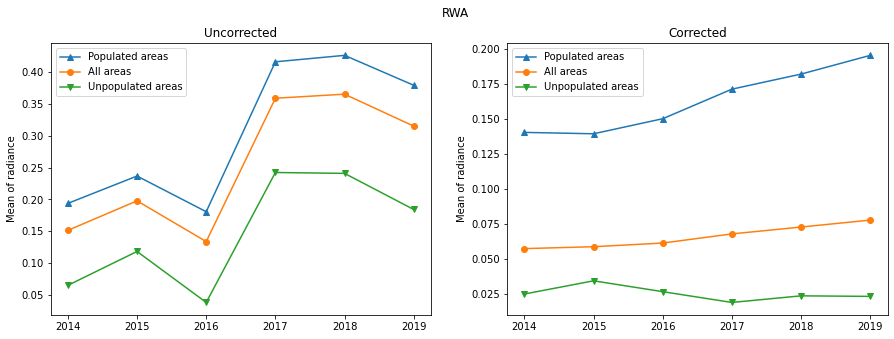

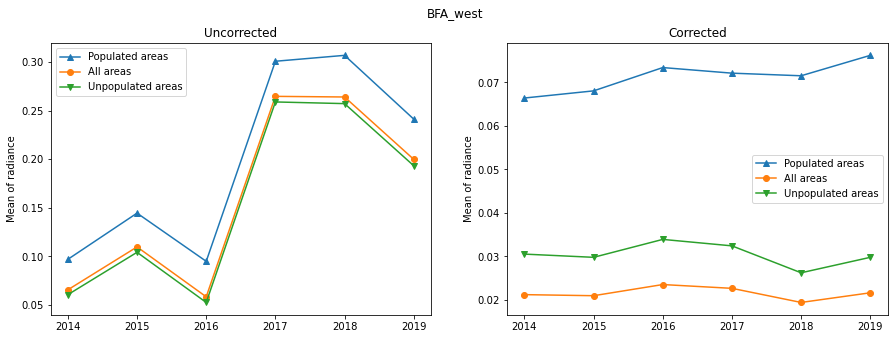

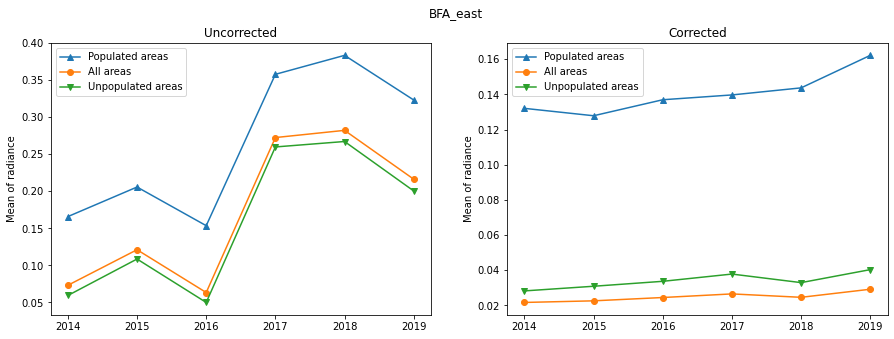

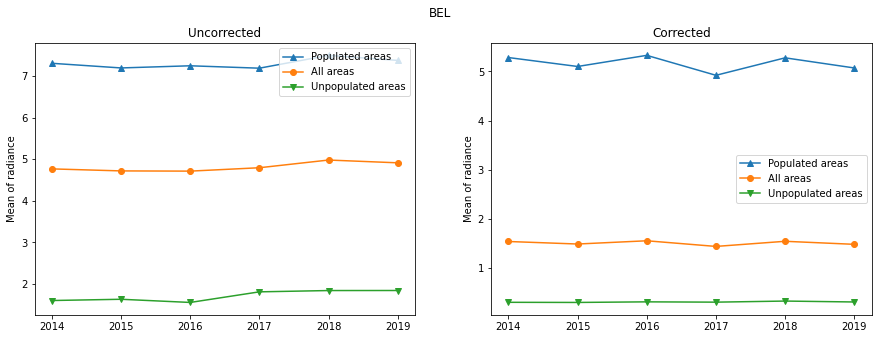

In [7]:
correction_plot(region_names)